In [1]:
import pandas as pd
import ast
from pandarallel import pandarallel
import ipaddress

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 60 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
rb_feat_file = 'csv/features/shodan_grouped_features_imploded.csv'

In [3]:
df = pd.read_csv(rb_feat_file)
df[list(set(df.columns.values) - set(['customer', 'Ranges']))]

,number_open_ports,date,dns_recursive,unique_ips,tls_config_errors,neutral_services,has_tls,reasonable_services,range_size,risky_services,tls_cert_errors,size
0,"[0, 0, 0, 0, 0, 0, 0, 0]",2009-08-01,"[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[8, 32, 8, 8, 256, 16, 256, 8]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]",592
1,"[0, 0, 0, 0, 0, 0, 0, 0]",2009-08-01,"[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[8, 16, 8, 8, 8, 64, 32, 256]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]",400
2,[0],2009-08-01,[0],[0],[0],[0],[0],[0],[512],[0],[0],512
3,[0],2009-08-01,[0],[0],[0],[0],[0],[0],[512],[0],[0],512
4,"[0, 0, 0, 0]",2009-08-01,"[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[128, 256, 256, 128]","[0, 0, 0, 0]","[0, 0, 0, 0]",768
...,...,...,...,...,...,...,...,...,...,...,...,...
529562,[0],2022-01-15,[0],[0],[0],[0],[0],[0],[16],[0],[0],16
529563,"[0, 0]",2022-01-15,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[16, 16]","[0, 0]","[0, 0]",32
529564,[0],2022-01-15,[0],[0],[0],[0],[0],[0],[8],[0],[0],8
529565,[0],2022-01-15,[0],[0],[0],[0],[0],[0],[256],[0],[0],256


In [4]:
%%time

all_cols = list(df.columns.values)
group_cols = ['date', 'customer', 'size']
explode_cols = list( set(all_cols) - set(group_cols) )

# for col in explode_cols:
#     df[col] = df[col].parallel_apply(ast.literal_eval)

# df


def process_cols(row):
    for col in explode_cols:
        row[col] = ast.literal_eval(row[col])
        
    return row

df = df.sample(frac=1).parallel_apply(process_cols, axis=1)

CPU times: user 24.4 s, sys: 4.64 s, total: 29 s
Wall time: 1min 2s


In [5]:
df[list(set(df.columns.values) - set(['customer', 'Ranges']))]

,number_open_ports,date,dns_recursive,unique_ips,tls_config_errors,neutral_services,has_tls,reasonable_services,range_size,risky_services,tls_cert_errors,size
255195,"[0, 0, 0]",2015-02-20,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[1024, 512, 512]","[0, 0, 0]","[0, 0, 0]",2048
58275,"[0, 0, 0, 0, 0, 0, 1, 0]",2010-12-19,"[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[8, 8, 8, 16, 128, 8, 256, 8]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]",440
407924,"[0, 0, 0, 0, 0, 0, 0, 0, 173, 0, 0, 0, 0, 0]",2018-08-07,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 155, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 61, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 31, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0]","[4, 4, 4, 8, 8, 8, 8, 8, 65536, 4096, 8, 512, ...","[0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",71484
516521,[0],2021-09-01,[0],[0],[0],[0],[0],[0],[32],[0],[0],32
240458,[0],2014-10-30,[0],[0],[0],[0],[0],[0],[8],[0],[0],8
...,...,...,...,...,...,...,...,...,...,...,...,...
110965,[1],2012-02-19,[0],[1],[0],[0],[0],[0],[256],[0],[0],256
509638,"[4, 5, 0, 0, 0]",2021-06-22,"[0, 0, 0, 0, 0]","[3, 4, 0, 0, 0]","[0, 0, 0, 0, 0]","[1, 4, 0, 0, 0]","[0, 3, 0, 0, 0]","[1, 0, 0, 0, 0]","[1024, 64, 256, 512, 1]","[0, 0, 0, 0, 0]","[0, 1, 0, 0, 0]",1857
284184,"[0, 0]",2015-10-07,"[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[4, 4]","[0, 0]","[0, 0]",8
63169,[0],2011-01-28,[0],[0],[0],[0],[0],[0],[32],[0],[0],32


In [6]:
FEATURE_FILES = {
    'apews': 'csv/features/apews_features.csv',
    'cbl': 'csv/features/cbl_features.csv',
#     'pbl': 'csv/features/pbl_features.csv',
    'phishtank': 'csv/features/phishtank_features.csv',
    'psbl': 'csv/features/psbl_features.csv',
    'xbl': 'csv/features/xbl_features.csv',
}

FEATURE_COLNAMES = {
    'apews': 'apews_ranges',
    'cbl': 'cbl_ips',
#     'pbl': 'csv/features/pbl_features.csv',
    'phishtank': 'phishtank_ips',
    'psbl': 'psbl_ips',
    'xbl': 'xbl_ips',
}

def process_ips_col(col):
    return col.replace('nan', '[]')

merged = df.copy()
for name, filepath in FEATURE_FILES.items():
    print(f'processing {name}')
    fdf = pd.read_csv(filepath)
    fdf[FEATURE_COLNAMES[name]] = fdf[FEATURE_COLNAMES[name]].apply(process_ips_col)
    fdf = fdf.drop(columns=['Organization','first','last','ripe_ranges_size','Ranges','ripe_names'])
    merged = merged.merge(fdf, on=['date', 'customer', 'size'], how='inner')
    
merged[list(set(merged.columns.values) - set(['customer', 'Ranges']))]

processing apews
processing cbl
processing phishtank
processing psbl
processing xbl


,number_open_ports,xbl_ips,psbl_ips,apews_unique_ip_count,has_tls,tls_config_errors,cbl_ips,risky_services,xbl_count,tls_cert_errors,...,psbl_count,date,dns_recursive,unique_ips,neutral_services,cbl_count,apews_malicious_range,range_size,phishtank_ips,size
0,"[0, 0, 0]","[[], [], []]","[[], [], []]","[<NA>, <NA>, <NA>]","[0, 0, 0]","[0, 0, 0]","[[], [], []]","[0, 0, 0]","[<NA>, <NA>, <NA>]","[0, 0, 0]",...,"[0, 0, 0]",2015-02-20,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[<NA>, <NA>, <NA>]","[<NA>, <NA>, <NA>]","[1024, 512, 512]","[[], [], []]",2048
1,"[0, 0, 0, 0, 0, 0, 1, 0]","[[], [], [], [], [], [], [], []]","[[], [], [], [], [], [], [], []]","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>]","[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[[], [], [], [], [], [], [], []]","[0, 0, 0, 0, 0, 0, 0, 0]","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>]","[0, 0, 0, 0, 0, 0, 0, 0]",...,"[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>]",2010-12-19,"[0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 0]","[0, 0, 0, 0, 0, 0, 0, 0]","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>]","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>]","[8, 8, 8, 16, 128, 8, 256, 8]","[[], [], [], [], [], [], [], []]",440
2,"[0, 0, 0, 0, 0, 0, 0, 0, 173, 0, 0, 0, 0, 0]","[[], [], [], [], [], [], [], [], [], [], [], [...","[[], [], [], [], [], [], [], [], [], [], [], [...","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...","[0, 0, 0, 0, 0, 0, 0, 0, 31, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]","[[], [], [], [], [], [], [], [], [], [], [], [...","[0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2018-08-07,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 155, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 61, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...","[4, 4, 4, 8, 8, 8, 8, 8, 65536, 4096, 8, 512, ...","[[], [], [], [], [], [], [], [], [], [], [], [...",71484
3,[0],[[]],[[]],[0],[0],[0],[[]],[0],[0],[0],...,[0],2021-09-01,[0],[0],[0],[<NA>],[0],[32],[[]],32
4,[0],[[]],[[]],[0],[0],[0],[[]],[0],[<NA>],[0],...,[0],2014-10-30,[0],[0],[0],[<NA>],[0],[8],[[]],8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529562,[1],[[]],[[]],[<NA>],[0],[0],[[]],[0],[<NA>],[0],...,[<NA>],2012-02-19,[0],[1],[0],[<NA>],[<NA>],[256],[[]],256
529563,"[4, 5, 0, 0, 0]","[[], [], ['194.53.114.80'], [], []]","[[], [], [], [], []]","[<NA>, <NA>, <NA>, <NA>, <NA>]","[0, 3, 0, 0, 0]","[0, 0, 0, 0, 0]","[[], [], [], [], []]","[0, 0, 0, 0, 0]","[0, 0, 1, 0, 0]","[0, 1, 0, 0, 0]",...,"[0, 0, 0, 0, 0]",2021-06-22,"[0, 0, 0, 0, 0]","[3, 4, 0, 0, 0]","[1, 4, 0, 0, 0]","[<NA>, <NA>, <NA>, <NA>, <NA>]","[<NA>, <NA>, <NA>, <NA>, <NA>]","[1024, 64, 256, 512, 1]","[[], [], [], [], []]",1857
529564,"[0, 0]","[[], []]","[[], []]","[<NA>, <NA>]","[0, 0]","[0, 0]","[[], []]","[0, 0]","[<NA>, <NA>]","[0, 0]",...,"[0, 0]",2015-10-07,"[0, 0]","[0, 0]","[0, 0]","[<NA>, <NA>]","[<NA>, <NA>]","[4, 4]","[[], []]",8
529565,[0],[[]],[[]],[<NA>],[0],[0],[[]],[0],[<NA>],[0],...,[<NA>],2011-01-28,[0],[0],[0],[<NA>],[<NA>],[32],[[]],32


In [7]:
spam_feat_cols = ['apews_ranges', 'psbl_ips']
phishing_feat_cols = ['phishtank_ips']
misc_feat_cols = ['cbl_ips', 'xbl_ips']

FEATURE_CATEGORIES = {
    'spam': spam_feat_cols,
    'phishing': phishing_feat_cols,
    'misc_malicious': misc_feat_cols,
}

def process_malicious_activity(row):
    # per feature category...
    for category, cols in FEATURE_CATEGORIES.items():
        ips_in_category = []
        ranges = []
        # combine the different IP lists from the blacklists
        # but also take IP ranges into account
        for col in cols:
            col_list = ast.literal_eval(row[col])
            for val in col_list:
                if type(val) == list:
                    ips_in_category.extend([ipaddress.IPv4Address(x) for x in val])
                elif type(value) == str:
                    ranges.append(ipaddress.IPv4Network(val))
                else:
                    raise Exception('Unknown value type. Should not happen.')
        
        # only count unique IP addresses
        ips_in_category = list( set(ips_in_category) )
        
        # remove IPs from count if they are part of the malicious range(s)
        if len(ranges) > 0:
            unique_ips = []
            for r in ranges:
                for ip in ips_in_category:
                    if ip in r:
                        break
                    # only add to unique IPs if the IP is not in any of the IP ranges
                    unique_ips.append(ip)
            ips_in_category = unique_ips
            
        result = len(ips_in_category)
        if len(ranges) > 0:
            for r in ranges:
                result += r.num_addresses
        row[category] = result
        
    return row

merged = merged.sample(frac=1).parallel_apply(process_malicious_activity, axis=1)
merged = merged.drop(columns=spam_feat_cols)
merged = merged.drop(columns=phishing_feat_cols)
merged = merged.drop(columns=misc_feat_cols)
merged[list(set(merged.columns.values) - set(['customer', 'Ranges']))]

,phishing,number_open_ports,apews_unique_ip_count,has_tls,tls_config_errors,spam,risky_services,xbl_count,tls_cert_errors,reasonable_services,...,psbl_count,date,dns_recursive,unique_ips,neutral_services,cbl_count,apews_malicious_range,range_size,misc_malicious,size
193268,0,"[0, 0, 0, 4, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",0,"[0, 0, 0, 1, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0]",2019-08-12,"[0, 0, 0, 0, 0]","[0, 0, 0, 4, 0]","[0, 0, 0, 2, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[256, 4, 256, 32, 256]",0,804
283394,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2015-04-25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...","[8, 8, 8, 8, 8, 8, 8, 8, 16, 16, 8]",0,104
264771,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0]","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]",0,"[0, 0, 0, 0, 1, 0, 0, 0, 0]","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]",...,"[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...",2012-08-31,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...","[8, 8, 8, 8, 65536, 8, 512, 1024, 256]",0,67368
238762,0,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[0, 0, 0]",0,"[0, 0, 0]","[<NA>, <NA>, <NA>]","[0, 0, 0]","[0, 0, 0]",...,"[0, 0, 0]",2016-09-17,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[<NA>, <NA>, <NA>]","[0, 0, 0]","[8, 8, 8]",0,24
6912,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",...,"[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...",2011-07-30,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...","[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA...","[4, 32, 4, 8, 8, 8, 8, 4, 4, 4, 4]",0,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194659,0,[0],[<NA>],[0],[0],0,[0],[<NA>],[0],[0],...,[0],2015-08-18,[0],[0],[0],[<NA>],[<NA>],[8],0,8
329195,0,[0],[<NA>],[0],[0],0,[0],[<NA>],[0],[0],...,[<NA>],2010-02-22,[0],[0],[0],[<NA>],[<NA>],[16],0,16
456577,0,"[0, 0, 3, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 0, 0, 0]",0,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0]",2018-07-17,"[0, 0, 0, 0, 0]","[0, 0, 3, 0, 0]","[0, 0, 1, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[512, 2048, 1024, 8, 32]",0,3624
175291,0,[1],[<NA>],[0],[0],0,[0],[0],[0],[0],...,[0],2019-11-13,[0],[1],[0],[0],[<NA>],[1024],0,1024


In [8]:
from operator import add
def blacklist_sum(row):
    value = 0
    for category, cols in FEATURE_CATEGORIES.items():
#         value = list( map(add, value, row[category]) )
        value += row[category]
    
    return value
    
merged['blacklist_sum'] = merged.parallel_apply(blacklist_sum, axis=1)

In [9]:
merged = merged.drop(columns=['apews_unique_ip_count','apews_malicious_range','cbl_count','phishtank_count','psbl_count','xbl_count'])
merged[list(set(merged.columns.values) - set(['customer', 'Ranges']))]

,blacklist_sum,phishing,number_open_ports,tls_config_errors,has_tls,spam,risky_services,reasonable_services,tls_cert_errors,date,dns_recursive,unique_ips,neutral_services,range_size,misc_malicious,size
193268,0,0,"[0, 0, 0, 4, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",0,"[0, 0, 0, 1, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",2019-08-12,"[0, 0, 0, 0, 0]","[0, 0, 0, 4, 0]","[0, 0, 0, 2, 0]","[256, 4, 256, 32, 256]",0,804
283394,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2015-04-25,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[8, 8, 8, 8, 8, 8, 8, 8, 16, 16, 8]",0,104
264771,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]",0,"[0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]",2012-08-31,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0]","[8, 8, 8, 8, 65536, 8, 512, 1024, 256]",0,67368
238762,0,0,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]",0,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]",2016-09-17,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[8, 8, 8]",0,24
6912,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",2011-07-30,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[4, 32, 4, 8, 8, 8, 8, 4, 4, 4, 4]",0,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194659,0,0,[0],[0],[0],0,[0],[0],[0],2015-08-18,[0],[0],[0],[8],0,8
329195,0,0,[0],[0],[0],0,[0],[0],[0],2010-02-22,[0],[0],[0],[16],0,16
456577,0,0,"[0, 0, 3, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 1, 0, 0]",0,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 1, 0, 0]",2018-07-17,"[0, 0, 0, 0, 0]","[0, 0, 3, 0, 0]","[0, 0, 1, 0, 0]","[512, 2048, 1024, 8, 32]",0,3624
175291,0,0,[1],[0],[0],0,[0],[0],[0],2019-11-13,[0],[1],[0],[1024],0,1024


In [10]:
all_cols = list(merged.columns.values)
def sum_cols(row):
    for col in list( set(all_cols) - set(['date','customer','size','Ranges']) ):
        if type(row[col]) == list:
            row[col] = sum(row[col])
    return row

merged = merged.parallel_apply(sum_cols, axis=1)

In [11]:
data = merged.copy()
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d')
data = data.set_index('date')
data = data.groupby([pd.Grouper(freq='M'), 'customer'])
data = data[list(set(all_cols) - set(['date','size','Ranges']))].sum()
# data

In [12]:
def calc_features(row):
    num_tls = row['has_tls']
    num_config_errors = row['tls_config_errors']
    num_cert_errors = row['tls_cert_errors']
    row['ratio_tls_config_errors'] = num_config_errors/num_tls if num_tls != 0 else -1
    row['ratio_tls_cert_errors'] = num_cert_errors/num_tls if num_tls != 0 else -1

    risky_services = row['risky_services']
    reasonable_services = row['reasonable_services']
    neutral_services = row['neutral_services']
    total_services = risky_services + reasonable_services + neutral_services
    row['ratio_risky_services'] = risky_services/total_services if total_services != 0 else -1
    row['ratio_reasonable_services'] = reasonable_services/total_services if total_services != 0 else -1
    row['ratio_neutral_services'] = neutral_services/total_services if total_services != 0 else -1

    return row

data = data.parallel_apply(calc_features, axis=1)
# data = data.apply(calc_features, axis=1)
# data

In [13]:
services = data[data['ratio_reasonable_services'] != -1]
tls = data[data['ratio_tls_config_errors'] != -1]

<AxesSubplot:xlabel='ratio_tls_cert_errors', ylabel='Count'>

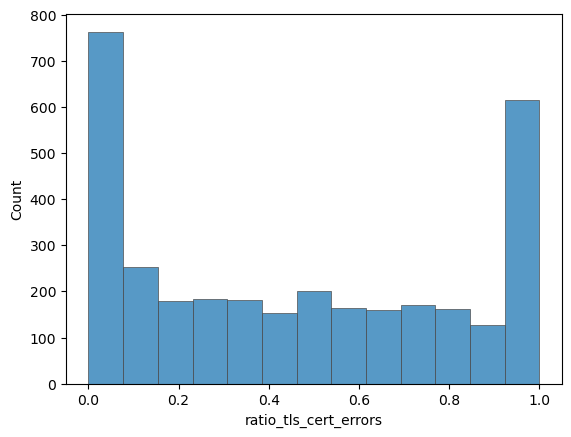

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# tls['ratio_tls_cert_errors'].hist(bins=40)
sns.histplot(
    tls,
    x="ratio_tls_cert_errors",
    edgecolor=".3",
    linewidth=.5,
#     log_scale=True,
)

<AxesSubplot:>

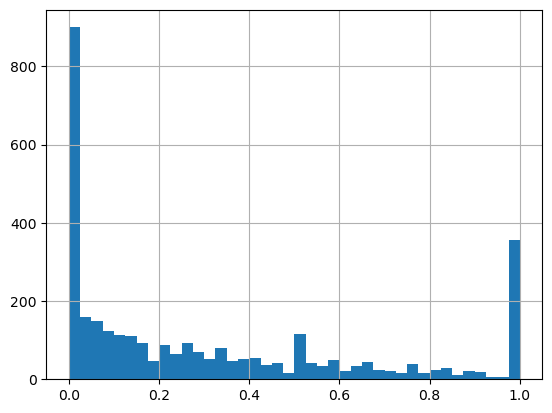

In [15]:
tls['ratio_tls_config_errors'].hist(bins=40)

<AxesSubplot:>

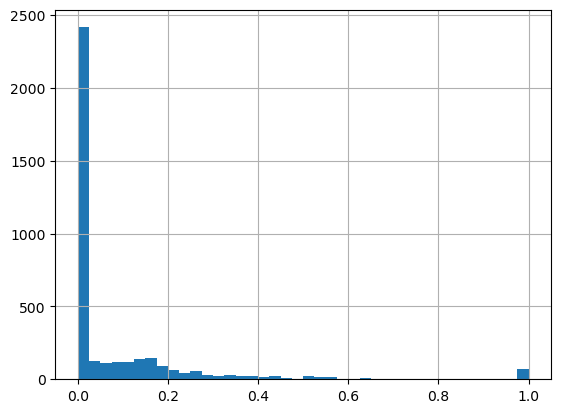

In [16]:
services['ratio_reasonable_services'].hist(bins=40)

<AxesSubplot:>

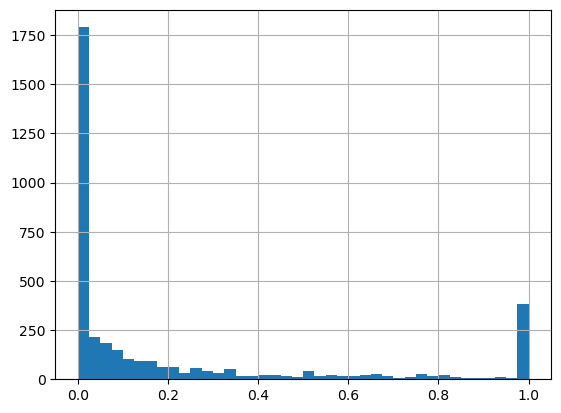

In [17]:
services['ratio_risky_services'].hist(bins=40)

In [18]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [19]:
services['present_in_blacklists'] = services['blacklist_sum'].apply(lambda x: x > 0)
tls['present_in_blacklists'] = tls['blacklist_sum'].apply(lambda x: x > 0)

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='ratio_risky_services', ylabel='present_in_blacklists'>

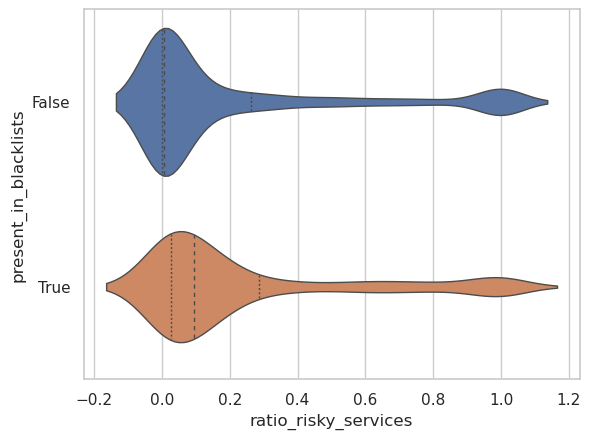

In [20]:
sns.violinplot(data=services, x="ratio_risky_services", y="present_in_blacklists",
               split=True, inner="quart", linewidth=1, orient='h')

<AxesSubplot:xlabel='ratio_tls_config_errors', ylabel='present_in_blacklists'>

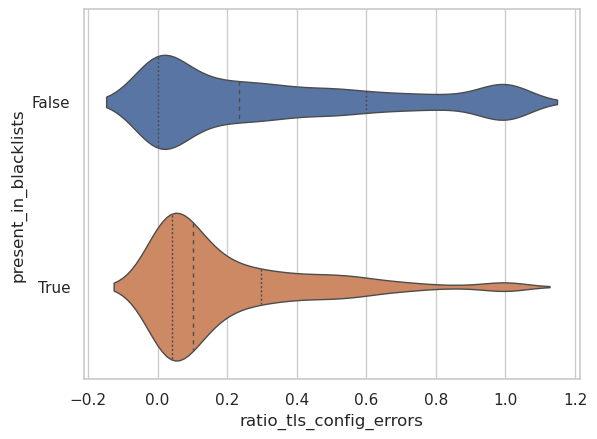

In [21]:
sns.violinplot(data=tls, x="ratio_tls_config_errors", y="present_in_blacklists",
               split=True, inner="quart", linewidth=1, orient='h')

<AxesSubplot:xlabel='ratio_tls_cert_errors', ylabel='present_in_blacklists'>

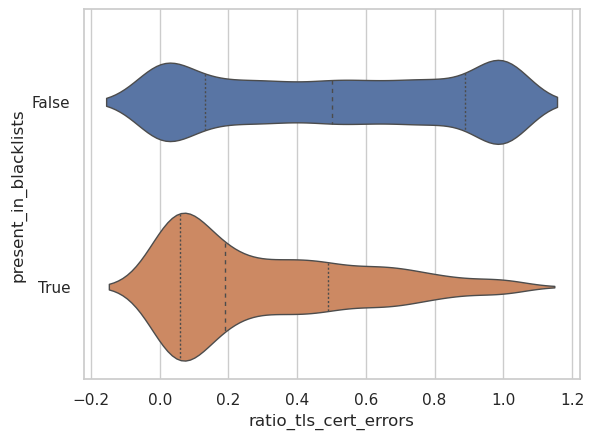

In [22]:
sns.violinplot(data=tls, x="ratio_tls_cert_errors", y="present_in_blacklists",
               split=True, inner="quart", linewidth=1, orient='h')